In [1]:
import os # Para obtener cambiar de directorio y obtener los datos
import pandas as pd # Leer los archivos csv
from sklearn.model_selection import train_test_split # Para dividir en entrenamiento y prueba los dato
from sklearn.model_selection import GridSearchCV # Usaremos GridSearch para ver si encontramos parámetros interesantes
from sklearn.neural_network import MLPClassifier # De aquí para las redes neuronales
from sklearn import metrics # Para obtener los resultados de nuestra red neuronal
import matplotlib.pylab as plt # Para graficar
import cv2   # Libreria OpenCV para leer imagenes
import numpy as np # Para hacer la matrices y más
from matplotlib import colors # Para graficar
from scipy import signal # Para los filtro de Gabor

In [2]:
os.chdir('/Users/Dekel Black/Desktop/Colores KNN') # Nos vamos a donde está los archivos
os.listdir()

['1.jpeg',
 '11.png',
 '12.jpg',
 '13.png',
 '244650299_1053134978559564_3371172996940109851_n.jpg',
 '244691175_1053134615226267_8788236219356208888_n.jpg',
 'antonio.jpg',
 'araceli.jpg',
 'azael.jpg',
 'brocoli_001_003.jpg',
 'cardy.jpg',
 'cardy2.png',
 'cast.jpg',
 'dome.jpg',
 'dome2.png',
 'FBcojJgVkAIleIq.jpg',
 'FB_g95YXsAMOKlE.jpg',
 'karely.jpg',
 'kevin.jpg',
 'kevin2.png',
 'manuej.jpeg',
 'manuej.jpg',
 'marce.jpg',
 'marce2.png',
 'Nier01.png',
 'Nier02.png',
 'Nier03.png',
 'Nier04.png',
 'Nier05.png',
 'perrito.jpg',
 'perrito2.png',
 'perrito223.jpg',
 'perro2.png',
 'pp.jpg',
 'pp2.png']

Centroides:
 [[204.81364  119.8601   111.07932 ]
 [207.72147  140.97203  113.27906 ]
 [224.7548   130.41878  118.46542 ]
 [161.63698  136.0257   110.5982  ]
 [ 56.48041  140.72044  106.933784]
 [195.22581  132.39261  118.1969  ]
 [115.52446  139.22157  101.68348 ]
 [140.44162  135.87936  107.437965]
 [179.43832  134.6692   112.30786 ]
 [ 32.22941  136.5224   113.06612 ]
 [ 86.31697  139.72095  107.51775 ]]
(11, 3)


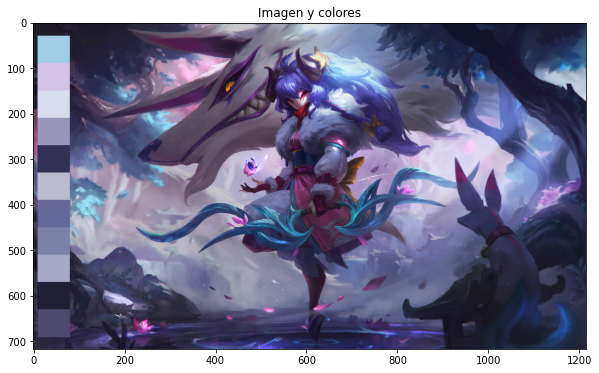

True

In [10]:
Img = cv2.imread('Kindred_3.jpg') # Leemos la imagen pero es en formato BGR
#plt.imshow(Img[:,:,::-1])
#plt.title('Nier')
#plt.show()
#print(Img.shape)

#coords1 = np.column_stack(np.where(mask1 > 0))

# Conversion al espacio Lab
labimg1 = cv2.cvtColor(Img, cv2.COLOR_BGR2LAB)

combinations = np.array(np.meshgrid(range(Img.shape[0]),range(Img.shape[1]))).T.reshape(-1,2)

lab1    = labimg1[combinations[:,0], combinations[:,1],:]
# Aplicamos el algoritmo de K medias para agrupar los colores 4 categorias
lab1_fl = np.float32(lab1) 

# Criterio de paro = ( type, max_iter = 100, epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

K = 11
compactness,labels,centers = cv2.kmeans(lab1_fl, K, None, criteria,1, flags)
print('Centroides:\n', centers)
print(centers.shape)
kcolors = np.uint(centers)

for i in range(K):
    pt1   = (10,30+60*i)
    pt2   = (80,30+60*(i+1))
    color = (int(kcolors[i,0]), int(kcolors[i,1]),int(kcolors[i,2]))
    _ = cv2.rectangle(labimg1, pt1, pt2, color, thickness=-1)
    
bgrimg = cv2.cvtColor(labimg1, cv2.COLOR_LAB2BGR)
fig, ax    = plt.subplots(figsize=(11, 6))
ax.imshow(bgrimg[:,:,::-1])
plt.title('Imagen y colores')
plt.show()

cv2.imwrite('Kindred_32.png',bgrimg)